# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
init_state = np.concatenate([init_pose, init_velocities, init_angle_velocities])
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

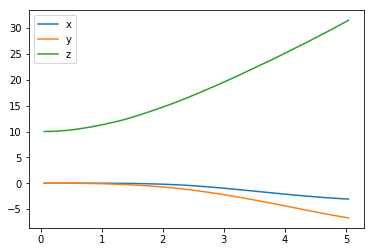

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

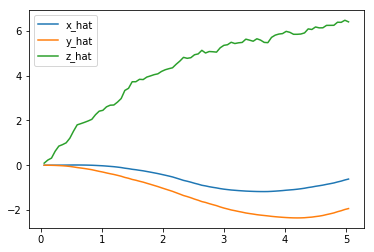

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

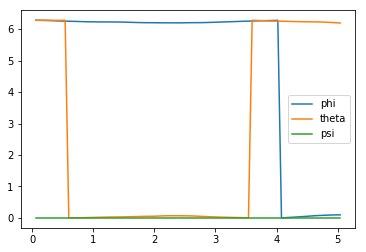

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

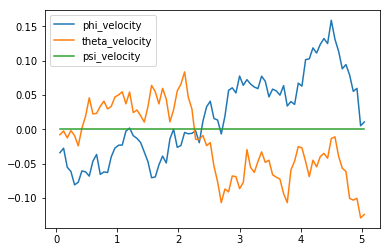

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

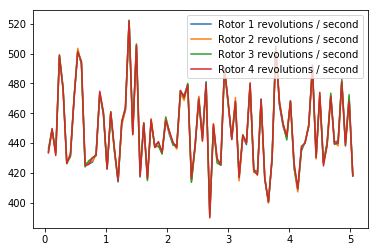

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-3.06138965 -6.70478632 31.51878021  0.0970265   6.19567973  0.        ]
[-0.61820331 -1.93673795  6.40734521]
[ 0.01060267 -0.12414658  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale))  # [debug]
            break
    sys.stdout.flush()

Episode =    1, score = 294755.558 (best = 294755.558), noise_scale = 0.05
Episode =    2, score = 296182.306 (best = 296182.306), noise_scale = 0.025
Episode =    3, score = 296177.012 (best = 296182.306), noise_scale = 0.05
Episode =    4, score = 296914.093 (best = 296914.093), noise_scale = 0.025
Episode =    5, score = 296652.427 (best = 296914.093), noise_scale = 0.05
Episode =    6, score = 296217.052 (best = 296914.093), noise_scale = 0.1
Episode =    7, score = 298231.222 (best = 298231.222), noise_scale = 0.05
Episode =    8, score = 297900.136 (best = 298231.222), noise_scale = 0.1
Episode =    9, score = 298059.343 (best = 298231.222), noise_scale = 0.2
Episode =   10, score = 295785.862 (best = 298231.222), noise_scale = 0.4
Episode =   11, score = 303615.480 (best = 303615.480), noise_scale = 0.2
Episode =   12, score = 309938.198 (best = 309938.198), noise_scale = 0.1
Episode =   13, score = 309220.566 (best = 309938.198), noise_scale = 0.2
Episode =   14, score = 308063

Episode =  109, score = 5954886.804 (best = 26127802.949), noise_scale = 3.2
Episode =  110, score = 618009.386 (best = 26127802.949), noise_scale = 3.2
Episode =  111, score = 939364.233 (best = 26127802.949), noise_scale = 3.2
Episode =  112, score = 958900.999 (best = 26127802.949), noise_scale = 3.2
Episode =  113, score = 1990958.503 (best = 26127802.949), noise_scale = 3.2
Episode =  114, score = 975677.653 (best = 26127802.949), noise_scale = 3.2
Episode =  115, score = 839211.007 (best = 26127802.949), noise_scale = 3.2
Episode =  116, score = 3126203.116 (best = 26127802.949), noise_scale = 3.2
Episode =  117, score = 1427424.512 (best = 26127802.949), noise_scale = 3.2
Episode =  118, score = 1165127.956 (best = 26127802.949), noise_scale = 3.2
Episode =  119, score = 1766490.674 (best = 26127802.949), noise_scale = 3.2
Episode =  120, score = 1414549.653 (best = 26127802.949), noise_scale = 3.2
Episode =  121, score = 1360784.536 (best = 26127802.949), noise_scale = 3.2
Epis

Episode =  216, score = 893628.884 (best = 74320474.467), noise_scale = 3.2
Episode =  217, score = 2361183.211 (best = 74320474.467), noise_scale = 3.2
Episode =  218, score = 1092739.723 (best = 74320474.467), noise_scale = 3.2
Episode =  219, score = 4715216.203 (best = 74320474.467), noise_scale = 3.2
Episode =  220, score = 3731260.947 (best = 74320474.467), noise_scale = 3.2
Episode =  221, score = 3387779.325 (best = 74320474.467), noise_scale = 3.2
Episode =  222, score = 771746.139 (best = 74320474.467), noise_scale = 3.2
Episode =  223, score = 1757367.624 (best = 74320474.467), noise_scale = 3.2
Episode =  224, score = 15366716.688 (best = 74320474.467), noise_scale = 3.2
Episode =  225, score = 934599.606 (best = 74320474.467), noise_scale = 3.2
Episode =  226, score = 45005745.683 (best = 74320474.467), noise_scale = 3.2
Episode =  227, score = 380338.811 (best = 74320474.467), noise_scale = 3.2
Episode =  228, score = 1204076.648 (best = 74320474.467), noise_scale = 3.2
E

Episode =  323, score = 1060731.244 (best = 74320474.467), noise_scale = 3.2
Episode =  324, score = 1633358.946 (best = 74320474.467), noise_scale = 3.2
Episode =  325, score = 878301.117 (best = 74320474.467), noise_scale = 3.2
Episode =  326, score = 1560871.619 (best = 74320474.467), noise_scale = 3.2
Episode =  327, score = 4910802.037 (best = 74320474.467), noise_scale = 3.2
Episode =  328, score = 1423362.703 (best = 74320474.467), noise_scale = 3.2
Episode =  329, score = 2376600.875 (best = 74320474.467), noise_scale = 3.2
Episode =  330, score = 1372229.331 (best = 74320474.467), noise_scale = 3.2
Episode =  331, score = 18524655.848 (best = 74320474.467), noise_scale = 3.2
Episode =  332, score = 5317932.266 (best = 74320474.467), noise_scale = 3.2
Episode =  333, score = 1889594.805 (best = 74320474.467), noise_scale = 3.2
Episode =  334, score = 1403991.920 (best = 74320474.467), noise_scale = 3.2
Episode =  335, score = 6978899.686 (best = 74320474.467), noise_scale = 3.2

Episode =  430, score = 1607682.564 (best = 74320474.467), noise_scale = 3.2
Episode =  431, score = 1182050.342 (best = 74320474.467), noise_scale = 3.2
Episode =  432, score = 1675903.321 (best = 74320474.467), noise_scale = 3.2
Episode =  433, score = 598459.236 (best = 74320474.467), noise_scale = 3.2
Episode =  434, score = 10481522.471 (best = 74320474.467), noise_scale = 3.2
Episode =  435, score = 3090553.595 (best = 74320474.467), noise_scale = 3.2
Episode =  436, score = 652419.564 (best = 74320474.467), noise_scale = 3.2
Episode =  437, score = 1406298.627 (best = 74320474.467), noise_scale = 3.2
Episode =  438, score = 1844040.288 (best = 74320474.467), noise_scale = 3.2
Episode =  439, score = 9097193.891 (best = 74320474.467), noise_scale = 3.2
Episode =  440, score = 3747245.101 (best = 74320474.467), noise_scale = 3.2
Episode =  441, score = 6542253.742 (best = 74320474.467), noise_scale = 3.2
Episode =  442, score = 571649.170 (best = 74320474.467), noise_scale = 3.2
E

Episode =  537, score = 535150.280 (best = 74320474.467), noise_scale = 3.2
Episode =  538, score = 1678156.339 (best = 74320474.467), noise_scale = 3.2
Episode =  539, score = 1091789.114 (best = 74320474.467), noise_scale = 3.2
Episode =  540, score = 437514.722 (best = 74320474.467), noise_scale = 3.2
Episode =  541, score = 2422066.330 (best = 74320474.467), noise_scale = 3.2
Episode =  542, score = 2142586.000 (best = 74320474.467), noise_scale = 3.2
Episode =  543, score = 1149025.996 (best = 74320474.467), noise_scale = 3.2
Episode =  544, score = 2339582.606 (best = 74320474.467), noise_scale = 3.2
Episode =  545, score = 551658.479 (best = 74320474.467), noise_scale = 3.2
Episode =  546, score = 509239.298 (best = 74320474.467), noise_scale = 3.2
Episode =  547, score = 1661683.311 (best = 74320474.467), noise_scale = 3.2
Episode =  548, score = 4380780.781 (best = 74320474.467), noise_scale = 3.2
Episode =  549, score = 584483.820 (best = 74320474.467), noise_scale = 3.2
Epis

Episode =  644, score = 441282.718 (best = 74320474.467), noise_scale = 3.2
Episode =  645, score = 933551.419 (best = 74320474.467), noise_scale = 3.2
Episode =  646, score = 1856608.292 (best = 74320474.467), noise_scale = 3.2
Episode =  647, score = 3730636.030 (best = 74320474.467), noise_scale = 3.2
Episode =  648, score = 525361.838 (best = 74320474.467), noise_scale = 3.2
Episode =  649, score = 672445.753 (best = 74320474.467), noise_scale = 3.2
Episode =  650, score = 4545903.220 (best = 74320474.467), noise_scale = 3.2
Episode =  651, score = 9214368.359 (best = 74320474.467), noise_scale = 3.2
Episode =  652, score = 1491523.459 (best = 74320474.467), noise_scale = 3.2
Episode =  653, score = 745791.152 (best = 74320474.467), noise_scale = 3.2
Episode =  654, score = 636017.243 (best = 74320474.467), noise_scale = 3.2
Episode =  655, score = 697333.790 (best = 74320474.467), noise_scale = 3.2
Episode =  656, score = 1528808.527 (best = 74320474.467), noise_scale = 3.2
Episod

Episode =  751, score = 3353494.371 (best = 355913075.112), noise_scale = 3.2
Episode =  752, score = 1009666.801 (best = 355913075.112), noise_scale = 3.2
Episode =  753, score = 700027.310 (best = 355913075.112), noise_scale = 3.2
Episode =  754, score = 900157.725 (best = 355913075.112), noise_scale = 3.2
Episode =  755, score = 952084.518 (best = 355913075.112), noise_scale = 3.2
Episode =  756, score = 1067953.845 (best = 355913075.112), noise_scale = 3.2
Episode =  757, score = 1802542.309 (best = 355913075.112), noise_scale = 3.2
Episode =  758, score = 767364.298 (best = 355913075.112), noise_scale = 3.2
Episode =  759, score = 997435.964 (best = 355913075.112), noise_scale = 3.2
Episode =  760, score = 15837165.084 (best = 355913075.112), noise_scale = 3.2
Episode =  761, score = 2851247.598 (best = 355913075.112), noise_scale = 3.2
Episode =  762, score = 522117.502 (best = 355913075.112), noise_scale = 3.2
Episode =  763, score = 1765650.881 (best = 355913075.112), noise_sca

Episode =  857, score = 412477.745 (best = 970300400.618), noise_scale = 3.2
Episode =  858, score = 433002.424 (best = 970300400.618), noise_scale = 3.2
Episode =  859, score = 962341.529 (best = 970300400.618), noise_scale = 3.2
Episode =  860, score = 1575307.101 (best = 970300400.618), noise_scale = 3.2
Episode =  861, score = 1350027.960 (best = 970300400.618), noise_scale = 3.2
Episode =  862, score = 467188.404 (best = 970300400.618), noise_scale = 3.2
Episode =  863, score = 3524376.434 (best = 970300400.618), noise_scale = 3.2
Episode =  864, score = 2308823.932 (best = 970300400.618), noise_scale = 3.2
Episode =  865, score = 16014096.713 (best = 970300400.618), noise_scale = 3.2
Episode =  866, score = 762144.434 (best = 970300400.618), noise_scale = 3.2
Episode =  867, score = 309313.129 (best = 970300400.618), noise_scale = 3.2
Episode =  868, score = 753427.245 (best = 970300400.618), noise_scale = 3.2
Episode =  869, score = 1115344.177 (best = 970300400.618), noise_scal

Episode =  963, score = 730491.630 (best = 970300400.618), noise_scale = 3.2
Episode =  964, score = 283367.348 (best = 970300400.618), noise_scale = 3.2
Episode =  965, score = 1500339.713 (best = 970300400.618), noise_scale = 3.2
Episode =  966, score = 7367735.707 (best = 970300400.618), noise_scale = 3.2
Episode =  967, score = 5375150.667 (best = 970300400.618), noise_scale = 3.2
Episode =  968, score = 658494.403 (best = 970300400.618), noise_scale = 3.2
Episode =  969, score = 6388849.557 (best = 970300400.618), noise_scale = 3.2
Episode =  970, score = 482972.514 (best = 970300400.618), noise_scale = 3.2
Episode =  971, score = 65807725.168 (best = 970300400.618), noise_scale = 3.2
Episode =  972, score = 8100142.998 (best = 970300400.618), noise_scale = 3.2
Episode =  973, score = 4342633.036 (best = 970300400.618), noise_scale = 3.2
Episode =  974, score = 2508816.703 (best = 970300400.618), noise_scale = 3.2
Episode =  975, score = 604261.434 (best = 970300400.618), noise_sc

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [1]:
import random
from collections import namedtuple, deque

class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, buffer_size, batch_size):
        """Initialize a ReplayBuffer object.
        Params
        ======
            buffer_size: maximum size of buffer
            batch_size: size of each training batch
        """
        self.memory = deque(maxlen=buffer_size)  # internal memory (deque)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])

    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)

    def sample(self, batch_size=64):
        """Randomly sample a batch of experiences from memory."""
        return random.sample(self.memory, k=self.batch_size)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

In [2]:
from keras import layers, models, optimizers
from keras import backend as K

class Actor:
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, action_low, action_high):
        """Initialize parameters and build model.

        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            action_low (array): Min value of each action dimension
            action_high (array): Max value of each action dimension
        """
        self.state_size = state_size
        self.action_size = action_size
        self.action_low = action_low
        self.action_high = action_high
        self.action_range = self.action_high - self.action_low

        # Initialize any other variables here

        self.build_model()

    def build_model(self):
        """Build an actor (policy) network that maps states -> actions."""
        # Define input layer (states)
        states = layers.Input(shape=(self.state_size,), name='states')

        # Add hidden layers
        net = layers.Dense(units=32, activation='relu')(states)
        net = layers.Dense(units=64, activation='relu')(net)
        net = layers.Dense(units=32, activation='relu')(net)

        # Try different layer sizes, activations, add batch normalization, regularizers, etc.

        # Add final output layer with sigmoid activation
        raw_actions = layers.Dense(units=self.action_size, activation='sigmoid',
            name='raw_actions')(net)

        # Scale [0, 1] output for each action dimension to proper range
        actions = layers.Lambda(lambda x: (x * self.action_range) + self.action_low,
            name='actions')(raw_actions)

        # Create Keras model
        self.model = models.Model(inputs=states, outputs=actions)

        # Define loss function using action value (Q value) gradients
        action_gradients = layers.Input(shape=(self.action_size,))
        loss = K.mean(-action_gradients * actions)

        # Incorporate any additional losses here (e.g. from regularizers)

        # Define optimizer and training function
        optimizer = optimizers.Adam()
        updates_op = optimizer.get_updates(params=self.model.trainable_weights, loss=loss)
        self.train_fn = K.function(
            inputs=[self.model.input, action_gradients, K.learning_phase()],
            outputs=[],
            updates=updates_op)

Using TensorFlow backend.


In [3]:
class Critic:
    """Critic (Value) Model."""

    def __init__(self, state_size, action_size):
        """Initialize parameters and build model.

        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
        """
        self.state_size = state_size
        self.action_size = action_size

        # Initialize any other variables here

        self.build_model()

    def build_model(self):
        """Build a critic (value) network that maps (state, action) pairs -> Q-values."""
        # Define input layers
        states = layers.Input(shape=(self.state_size,), name='states')
        actions = layers.Input(shape=(self.action_size,), name='actions')

        # Add hidden layer(s) for state pathway
        net_states = layers.Dense(units=32, activation='relu')(states)
        net_states = layers.Dense(units=64, activation='relu')(net_states)

        # Add hidden layer(s) for action pathway
        net_actions = layers.Dense(units=32, activation='relu')(actions)
        net_actions = layers.Dense(units=64, activation='relu')(net_actions)

        # Try different layer sizes, activations, add batch normalization, regularizers, etc.

        # Combine state and action pathways
        net = layers.Add()([net_states, net_actions])
        net = layers.Activation('relu')(net)

        # Add more layers to the combined network if needed

        # Add final output layer to prduce action values (Q values)
        Q_values = layers.Dense(units=1, name='q_values')(net)

        # Create Keras model
        self.model = models.Model(inputs=[states, actions], outputs=Q_values)

        # Define optimizer and compile model for training with built-in loss function
        optimizer = optimizers.Adam()
        self.model.compile(optimizer=optimizer, loss='mse')

        # Compute action gradients (derivative of Q values w.r.t. to actions)
        action_gradients = K.gradients(Q_values, actions)

        # Define an additional function to fetch action gradients (to be used by actor model)
        self.get_action_gradients = K.function(
            inputs=[*self.model.input, K.learning_phase()],
            outputs=action_gradients)

In [1]:
class DDPG():
    """Reinforcement Learning agent that learns using DDPG."""
    def __init__(self, task):
        self.task = task
        self.state_size = task.state_size
        self.action_size = task.action_size
        self.action_low = task.action_low
        self.action_high = task.action_high

        # Actor (Policy) Model
        self.actor_local = Actor(self.state_size, self.action_size, self.action_low, self.action_high)
        self.actor_target = Actor(self.state_size, self.action_size, self.action_low, self.action_high)

        # Critic (Value) Model
        self.critic_local = Critic(self.state_size, self.action_size)
        self.critic_target = Critic(self.state_size, self.action_size)

        # Initialize target model parameters with local model parameters
        self.critic_target.model.set_weights(self.critic_local.model.get_weights())
        self.actor_target.model.set_weights(self.actor_local.model.get_weights())

        # Noise process
        self.exploration_mu = 0
        self.exploration_theta = 0.3
        self.exploration_sigma = 0.06
        self.noise = OUNoise(self.action_size, self.exploration_mu, self.exploration_theta, self.exploration_sigma)

        # Replay memory
        self.buffer_size = 100000
        self.batch_size = 64
        self.memory = ReplayBuffer(self.buffer_size, self.batch_size)

        # Algorithm parameters
        self.gamma = 0.99  # discount factor
        self.tau = 0.01  # for soft update of target parameters
        
        self.best_score = -np.inf
        

    def reset_episode(self):
        self.noise.reset()
        state = self.task.reset()
        self.last_state = state
        
        #initialize count/score
        self.count = 0
        self.score = 0
        self.total_reward = 0;
        
        return state

    def step(self, action, reward, next_state, done):
         # Save experience / reward
        self.memory.add(self.last_state, action, reward, next_state, done)

        # Learn, if enough samples are available in memory
        if len(self.memory) > self.batch_size:
            experiences = self.memory.sample()
            self.learn(experiences)

        # Roll over last state and action
        self.last_state = next_state
        
        self.count += 1.0
        self.total_reward += reward

    def act(self, state):
        """Returns actions for given state(s) as per current policy."""
        state = np.reshape(state, [-1, self.state_size])
        action = self.actor_local.model.predict(state)[0]
        return list(action + self.noise.sample())  # add some noise for exploration

    def learn(self, experiences):
        """Update policy and value parameters using given batch of experience tuples."""
        # Convert experience tuples to separate arrays for each element (states, actions, rewards, etc.)
        states = np.vstack([e.state for e in experiences if e is not None])
        actions = np.array([e.action for e in experiences if e is not None]).astype(np.float32).reshape(-1, self.action_size)
        rewards = np.array([e.reward for e in experiences if e is not None]).astype(np.float32).reshape(-1, 1)
        dones = np.array([e.done for e in experiences if e is not None]).astype(np.uint8).reshape(-1, 1)
        next_states = np.vstack([e.next_state for e in experiences if e is not None])

        # Get predicted next-state actions and Q values from target models
        #     Q_targets_next = critic_target(next_state, actor_target(next_state))
        actions_next = self.actor_target.model.predict_on_batch(next_states)
        Q_targets_next = self.critic_target.model.predict_on_batch([next_states, actions_next])

        # Compute Q targets for current states and train critic model (local)
        Q_targets = rewards + self.gamma * Q_targets_next * (1 - dones)
        self.critic_local.model.train_on_batch(x=[states, actions], y=Q_targets)

        # Train actor model (local)
        action_gradients = np.reshape(self.critic_local.get_action_gradients([states, actions, 0]), (-1, self.action_size))
        self.actor_local.train_fn([states, action_gradients, 1])  # custom training function

        # Soft-update target models
        self.soft_update(self.critic_local.model, self.critic_target.model)
        self.soft_update(self.actor_local.model, self.actor_target.model)
        
        self.score = self.total_reward / float(self.count) if self.count else 0.0
        if self.score > self.best_score:
            self.best_score = self.score
        

    def soft_update(self, local_model, target_model):
        """Soft update model parameters."""
        local_weights = np.array(local_model.get_weights())
        target_weights = np.array(target_model.get_weights())

        assert len(local_weights) == len(target_weights), "Local and target model parameters must have the same size"

        new_weights = self.tau * local_weights + (1 - self.tau) * target_weights
        target_model.set_weights(new_weights)

In [5]:
import numpy as np
import copy

class OUNoise:
    """Ornstein-Uhlenbeck process."""

    def __init__(self, size, mu, theta, sigma):
        """Initialize parameters and noise process."""
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)

    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.random.randn(len(x))
        self.state = x + dx
        return self.state

In [7]:
import sys
import pandas as pd
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = DDPG(task) 
rewards = []

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})".format(
                i_episode, agent.score, agent.best_score))  # [debug]
            rewards.append(agent.score)
            break
    sys.stdout.flush()

Episode =    1, score =   0.000 (best =    -inf)
Episode =    2, score =   0.000 (best =    -inf)
Episode =    3, score = 116587.073 (best = 2582492.763)
Episode =    4, score = 9561.510 (best = 2582492.763)
Episode =    5, score = 7194.368 (best = 2582492.763)
Episode =    6, score = 7206.488 (best = 2582492.763)
Episode =    7, score = 7209.045 (best = 2582492.763)
Episode =    8, score = 7204.693 (best = 2582492.763)
Episode =    9, score = 7206.080 (best = 2582492.763)
Episode =   10, score = 7191.928 (best = 2582492.763)
Episode =   11, score = 7210.090 (best = 2582492.763)
Episode =   12, score = 7207.279 (best = 2582492.763)
Episode =   13, score = 7208.955 (best = 2582492.763)
Episode =   14, score = 7209.621 (best = 2582492.763)
Episode =   15, score = 7188.285 (best = 2582492.763)
Episode =   16, score = 7209.907 (best = 2582492.763)
Episode =   17, score = 7207.494 (best = 2582492.763)
Episode =   18, score = 7201.636 (best = 2582492.763)
Episode =   19, score = 7208.155 (be

Episode =  151, score = 48628.820 (best = 2582492.763)
Episode =  152, score = 48653.985 (best = 2582492.763)
Episode =  153, score = 48642.911 (best = 2582492.763)
Episode =  154, score = 48643.051 (best = 2582492.763)
Episode =  155, score = 48644.961 (best = 2582492.763)
Episode =  156, score = 48659.297 (best = 2582492.763)
Episode =  157, score = 48647.289 (best = 2582492.763)
Episode =  158, score = 48639.277 (best = 2582492.763)
Episode =  159, score = 48643.482 (best = 2582492.763)
Episode =  160, score = 48653.042 (best = 2582492.763)
Episode =  161, score = 46977.171 (best = 2582492.763)
Episode =  162, score = 48631.763 (best = 2582492.763)
Episode =  163, score = 48661.164 (best = 2582492.763)
Episode =  164, score = 48653.807 (best = 2582492.763)
Episode =  165, score = 48630.831 (best = 2582492.763)
Episode =  166, score = 48649.693 (best = 2582492.763)
Episode =  167, score = 48629.166 (best = 2582492.763)
Episode =  168, score = 48643.708 (best = 2582492.763)
Episode = 

Episode =  300, score = 48644.832 (best = 2582492.763)
Episode =  301, score = 48636.848 (best = 2582492.763)
Episode =  302, score = 48647.956 (best = 2582492.763)
Episode =  303, score = 48654.920 (best = 2582492.763)
Episode =  304, score = 46968.585 (best = 2582492.763)
Episode =  305, score = 48639.004 (best = 2582492.763)
Episode =  306, score = 46972.702 (best = 2582492.763)
Episode =  307, score = 48640.128 (best = 2582492.763)
Episode =  308, score = 48640.598 (best = 2582492.763)
Episode =  309, score = 48639.262 (best = 2582492.763)
Episode =  310, score = 46983.841 (best = 2582492.763)
Episode =  311, score = 48663.354 (best = 2582492.763)
Episode =  312, score = 48635.498 (best = 2582492.763)
Episode =  313, score = 46978.392 (best = 2582492.763)
Episode =  314, score = 48646.896 (best = 2582492.763)
Episode =  315, score = 48635.556 (best = 2582492.763)
Episode =  316, score = 48643.652 (best = 2582492.763)
Episode =  317, score = 48660.631 (best = 2582492.763)
Episode = 

Episode =  449, score = 48637.231 (best = 2582492.763)
Episode =  450, score = 48640.562 (best = 2582492.763)
Episode =  451, score = 48653.320 (best = 2582492.763)
Episode =  452, score = 48639.431 (best = 2582492.763)
Episode =  453, score = 48649.696 (best = 2582492.763)
Episode =  454, score = 48640.597 (best = 2582492.763)
Episode =  455, score = 48646.066 (best = 2582492.763)
Episode =  456, score = 48646.133 (best = 2582492.763)
Episode =  457, score = 48615.044 (best = 2582492.763)
Episode =  458, score = 46974.246 (best = 2582492.763)
Episode =  459, score = 48655.350 (best = 2582492.763)
Episode =  460, score = 46980.125 (best = 2582492.763)
Episode =  461, score = 46969.189 (best = 2582492.763)
Episode =  462, score = 48626.847 (best = 2582492.763)
Episode =  463, score = 48641.936 (best = 2582492.763)
Episode =  464, score = 48649.405 (best = 2582492.763)
Episode =  465, score = 48638.834 (best = 2582492.763)
Episode =  466, score = 48648.608 (best = 2582492.763)
Episode = 

Episode =  598, score = 48650.626 (best = 2582492.763)
Episode =  599, score = 48644.082 (best = 2582492.763)
Episode =  600, score = 48649.036 (best = 2582492.763)
Episode =  601, score = 46972.308 (best = 2582492.763)
Episode =  602, score = 48644.833 (best = 2582492.763)
Episode =  603, score = 48634.251 (best = 2582492.763)
Episode =  604, score = 48642.257 (best = 2582492.763)
Episode =  605, score = 48648.785 (best = 2582492.763)
Episode =  606, score = 48643.030 (best = 2582492.763)
Episode =  607, score = 48631.439 (best = 2582492.763)
Episode =  608, score = 48646.710 (best = 2582492.763)
Episode =  609, score = 48625.554 (best = 2582492.763)
Episode =  610, score = 48629.637 (best = 2582492.763)
Episode =  611, score = 48648.673 (best = 2582492.763)
Episode =  612, score = 48637.293 (best = 2582492.763)
Episode =  613, score = 48648.843 (best = 2582492.763)
Episode =  614, score = 48635.166 (best = 2582492.763)
Episode =  615, score = 48647.258 (best = 2582492.763)
Episode = 

Episode =  747, score = 48650.471 (best = 2582492.763)
Episode =  748, score = 48653.528 (best = 2582492.763)
Episode =  749, score = 48639.126 (best = 2582492.763)
Episode =  750, score = 46975.274 (best = 2582492.763)
Episode =  751, score = 48643.558 (best = 2582492.763)
Episode =  752, score = 48639.910 (best = 2582492.763)
Episode =  753, score = 48634.927 (best = 2582492.763)
Episode =  754, score = 48650.450 (best = 2582492.763)
Episode =  755, score = 48650.361 (best = 2582492.763)
Episode =  756, score = 48638.870 (best = 2582492.763)
Episode =  757, score = 48633.953 (best = 2582492.763)
Episode =  758, score = 48642.245 (best = 2582492.763)
Episode =  759, score = 48649.671 (best = 2582492.763)
Episode =  760, score = 48631.891 (best = 2582492.763)
Episode =  761, score = 46979.744 (best = 2582492.763)
Episode =  762, score = 48642.538 (best = 2582492.763)
Episode =  763, score = 48638.139 (best = 2582492.763)
Episode =  764, score = 46974.544 (best = 2582492.763)
Episode = 

Episode =  896, score = 48657.175 (best = 2582492.763)
Episode =  897, score = 48648.902 (best = 2582492.763)
Episode =  898, score = 48641.285 (best = 2582492.763)
Episode =  899, score = 48637.028 (best = 2582492.763)
Episode =  900, score = 48650.568 (best = 2582492.763)
Episode =  901, score = 48648.273 (best = 2582492.763)
Episode =  902, score = 48637.676 (best = 2582492.763)
Episode =  903, score = 48642.236 (best = 2582492.763)
Episode =  904, score = 46969.225 (best = 2582492.763)
Episode =  905, score = 46983.082 (best = 2582492.763)
Episode =  906, score = 48635.041 (best = 2582492.763)
Episode =  907, score = 48634.581 (best = 2582492.763)
Episode =  908, score = 48648.599 (best = 2582492.763)
Episode =  909, score = 48639.876 (best = 2582492.763)
Episode =  910, score = 46968.439 (best = 2582492.763)
Episode =  911, score = 48648.112 (best = 2582492.763)
Episode =  912, score = 48629.510 (best = 2582492.763)
Episode =  913, score = 48640.049 (best = 2582492.763)
Episode = 

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(rewards, label='rewards')

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
I designed the reward function to incentivise the being close to the desired position much more than any other. I did this by checking if the distance was within a certain threshold, and, if it was, I would add a large reward inversely proportional to distance.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
I used DDPG. For the noise parameters, I optimized the noise to return to the mean slowly(mu = 0, theta = 0.3, sigma = 0.06). For the other parameters I did not modify them very much(gamma = 0.99, tau = 0.01). I used two neural networks with input layers and densely connected relu layers.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
It was a difficult task. It took many episodes to perform well and needed heavy modification to the reward function.
Learning mostly happened suddenly. The agent was stuck in a local minimum for a large period of time, and once it escaped, it was able to learn.
The agent finished with an average distance of 0.1 units away from target position

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
Optimizing the agent was the hardest part. It started out learning randomly, but when I started modifying the reward function, I could get consistantly good results.
I found it interesting how much power the reward function had over learning.